# **Task1**
## **Author:** Richard.L
## **Task description:**
The Mobile price classification dataset contains numeric
attributes, and it is perfect for beginners to learn about 
supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

## Importing Modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Reading Mobile price classification Dataset

In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

## Randomising the dataset

In [4]:
data = data.sample(frac=1).reset_index(drop=True)
data = data.drop(columns='id')

## Data Description

In [5]:
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1256     0          0.5         0  15       1          51    0.6   
1           1186     1          2.3         1   1       0          25    0.1   
2            880     0          0.5         1   7       1          32    0.5   
3           1605     1          1.3         0   1       1          51    0.8   
4           1383     0          1.7         0  11       1          40    0.1   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0         83        2  18        436      1308  2213    13     9         12   
1         88        4   7         85      1012  1270    18     9         17   
2        141        4  17        346       739  1141    19    17         20   
3         83        4  20        597       921  1310    11     9         10   
4        147        6  19        487       507  2510    18     9         19   

   three_g  touch_screen  wifi  
0        1             1     0  
1        0             1     0  
2        1             1     1  
3        1             1     1  
4        1             1     0

In [6]:
data.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
995           1072     1          0.5         1   6       1           4   
996            732     1          0.5         0   1       1           7   
997            667     0          0.7         1   8       0          23   
998           1496     1          1.3         1   0       0          42   
999           1859     0          0.5         1   0       1          47   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
995    0.5         92        1  12       1019      1640  2878     7     5   
996    0.4        113        6   2        367       968  1423    13     2   
997    0.8        136        4  14        666      1372  3720    19    10   
998    0.9        124        2   5        264       995  3537    15    14   
999    0.1         85        7   0         35      1706  2691    14    13   

     talk_time  three_g  touch_screen  wifi  
995         13        1             0     1  
996         19        1             1     1  
997         10        1             1     0  
998          6        1             0     0  
999         19        1             0     1

In [7]:
data.nunique() #unique values

battery_power    721
blue               2
clock_speed       26
dual_sim           2
fc                20
four_g             2
int_memory        63
m_dep             10
mobile_wt        121
n_cores            8
pc                21
px_height        694
px_width         743
ram              872
sc_h              15
sc_w              19
talk_time         19
three_g            2
touch_screen       2
wifi               2
dtype: int64

In [8]:
data.shape #shape of the dataset

(1000, 20)

In [9]:
data.isnull().sum() # checking for null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [10]:
print(data.groupby(["wifi"]).size())

wifi
0    493
1    507
dtype: int64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [12]:
data.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     1248.510000     0.516000     1.540900     0.517000     4.593000   
std       432.458227     0.499994     0.829268     0.499961     4.463325   
min       500.000000     0.000000     0.500000     0.000000     0.000000   
25%       895.000000     0.000000     0.700000     0.000000     1.000000   
50%      1246.500000     1.000000     1.500000     1.000000     3.000000   
75%      1629.250000     1.000000     2.300000     1.000000     7.000000   
max      1999.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep   mobile_wt      n_cores  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.487000    33.652000     0.517500   139.51100     4.328000   
std       0.500081    18.128694     0.280861    34.85155     2.288155   
min       0.000000     2.000000     0.100000    80.00000     1.000000   
25%       0.000000    18.000000     0.300000   109.75000     2.000000   
50%       0.000000    34.500000     0.500000   139.00000     4.000000   
75%       1.000000    49.000000     0.800000   170.00000     6.000000   
max       1.000000    64.000000     1.000000   200.00000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000

# Exploratory Data Analysis

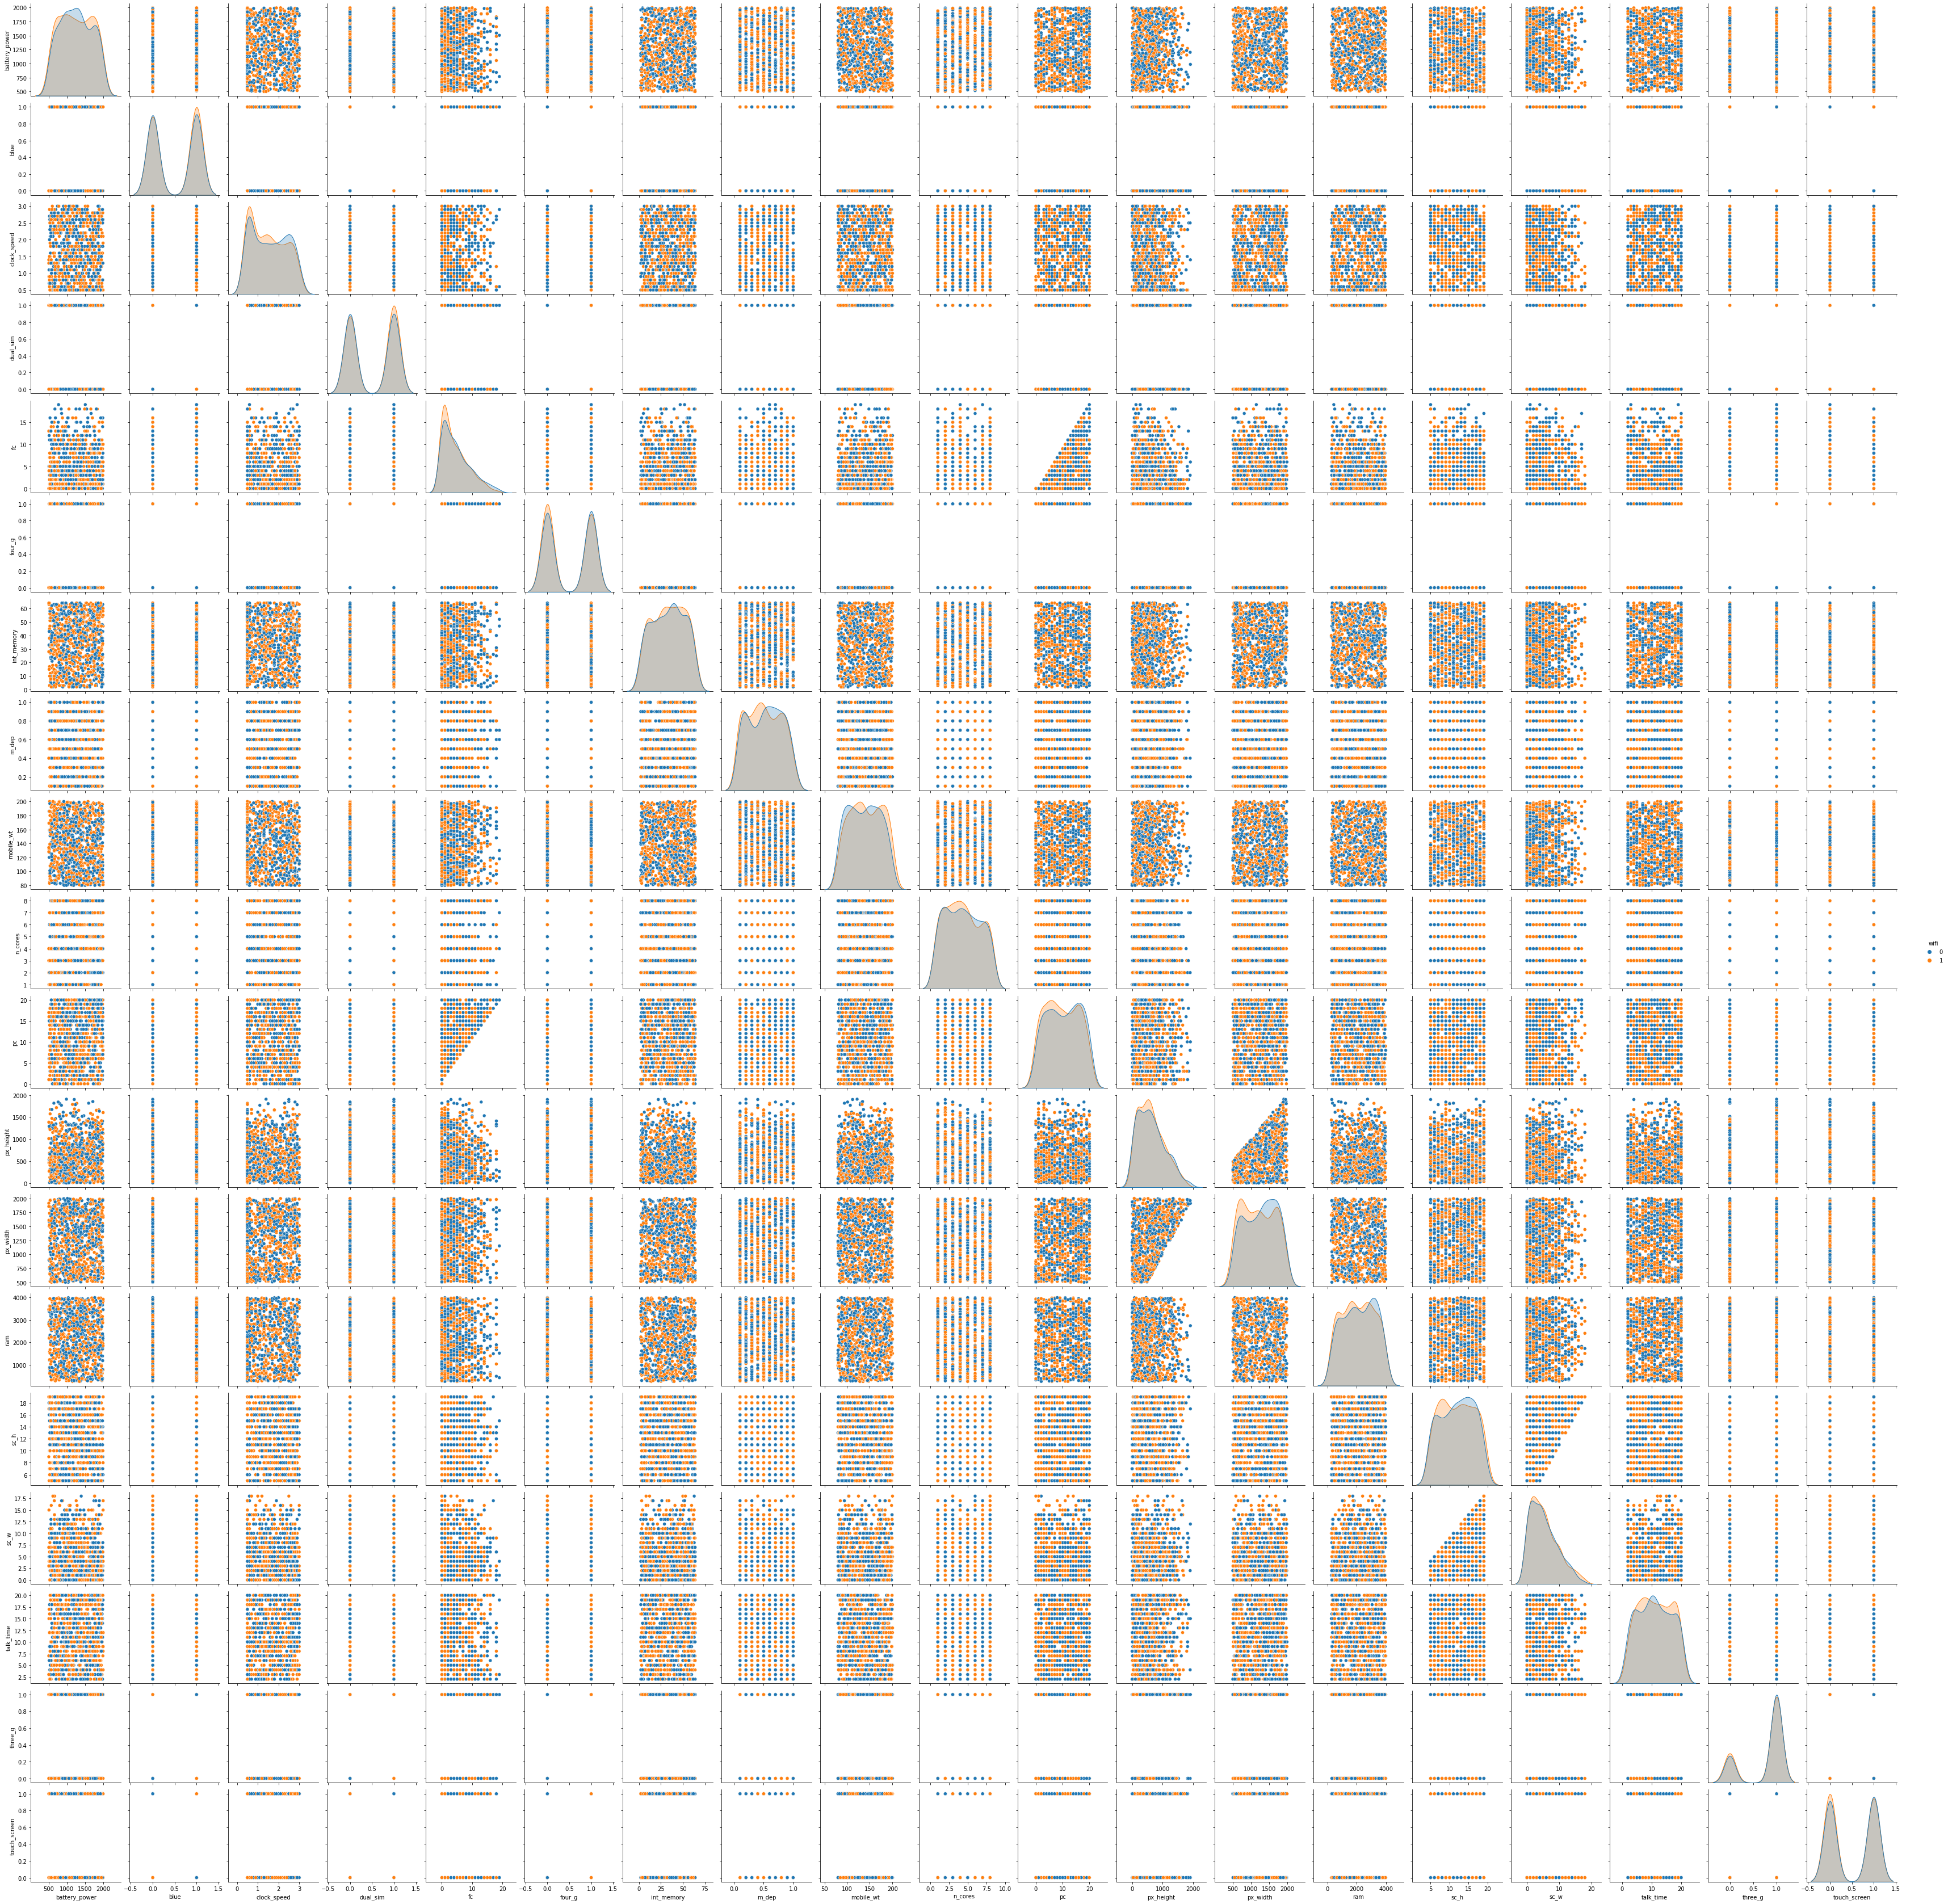

In [13]:
sns.pairplot(data, hue='wifi')

## Correlation Matrix

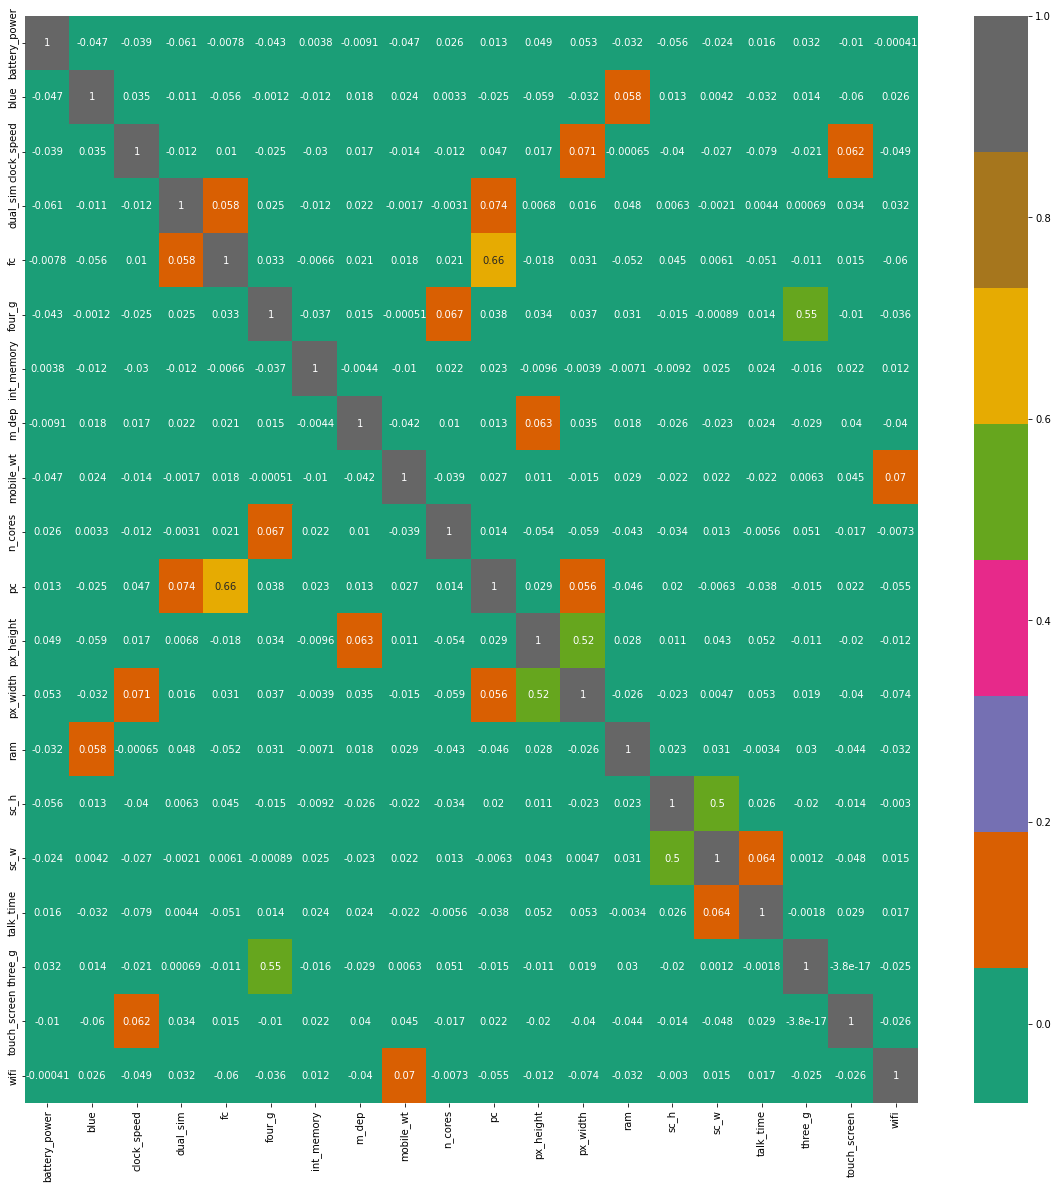

In [49]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="Dark2")

## Histogram of features

battery_power and blue

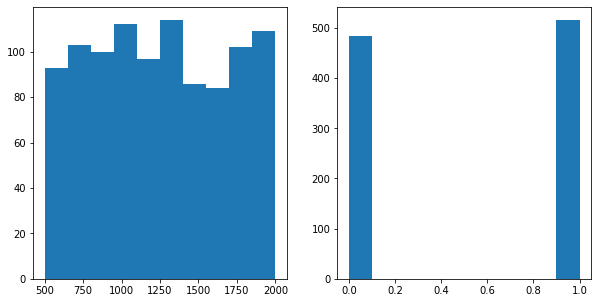

In [15]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['battery_power'])
f2.hist(data['blue'])
plt.show()

clock_speed and dual_sim

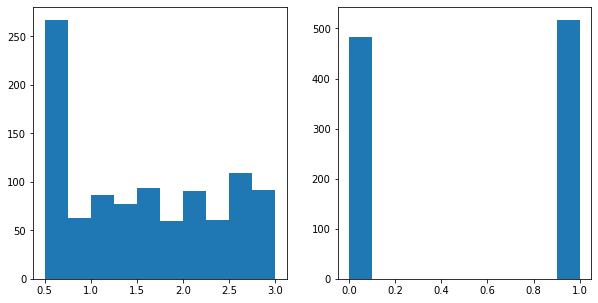

In [16]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['clock_speed'])
f2.hist(data['dual_sim'])
plt.show()

fc and four_g

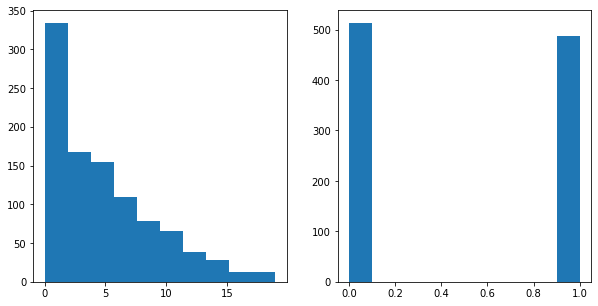

In [17]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['fc'])
f2.hist(data['four_g'])
plt.show()

int_memory and m_dep

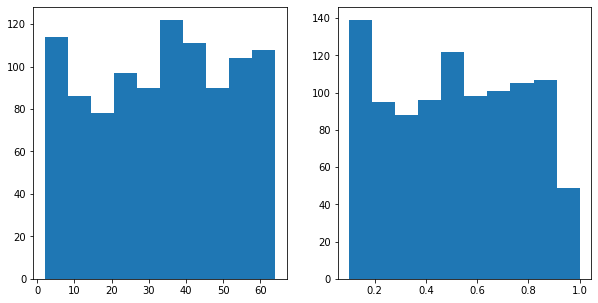

In [18]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['int_memory'])
f2.hist(data['m_dep'])
plt.show()

mobile_wt and n_cores

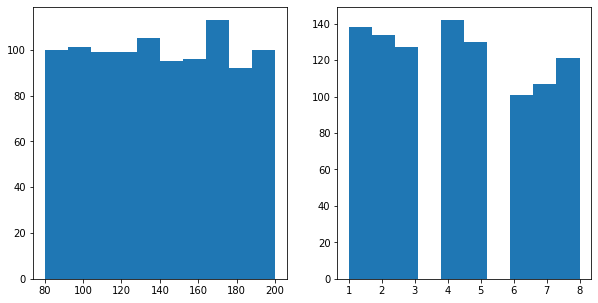

In [19]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['mobile_wt'])
f2.hist(data['n_cores'])
plt.show()

pc and px_height

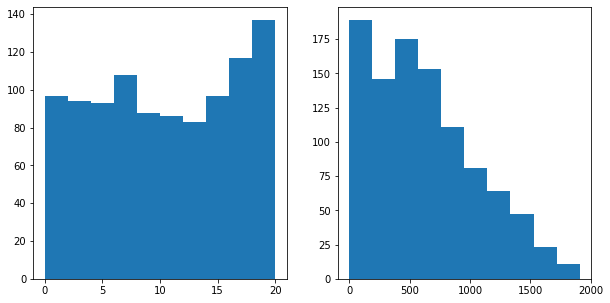

In [20]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['pc'])
f2.hist(data['px_height'])
plt.show()

px_width and ram

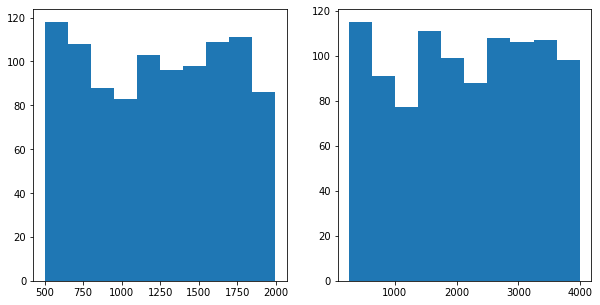

In [21]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['px_width'])
f2.hist(data['ram'])
plt.show()

sc_h and sc_w

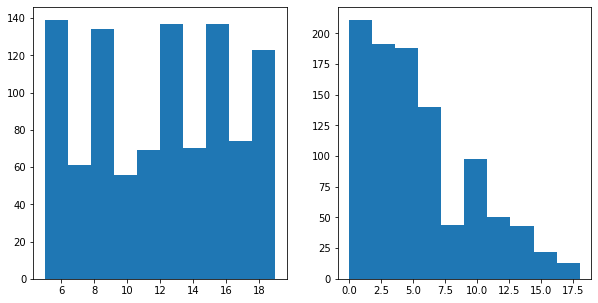

In [22]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['sc_h'])
f2.hist(data['sc_w'])
plt.show()

talk_time and three_g

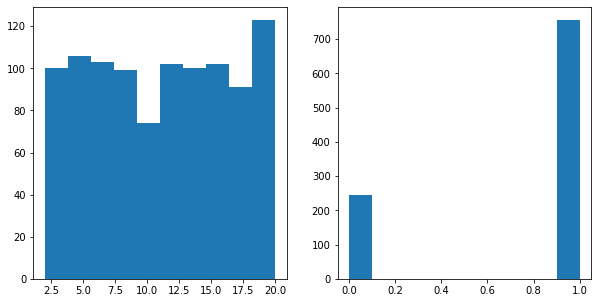

In [23]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['talk_time'])
f2.hist(data['three_g'])
plt.show()

touch_screen

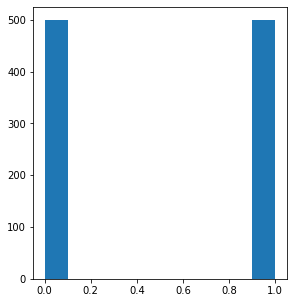

In [51]:
fig1 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f1.hist(data['touch_screen'])
plt.show()

## Boxplots of features

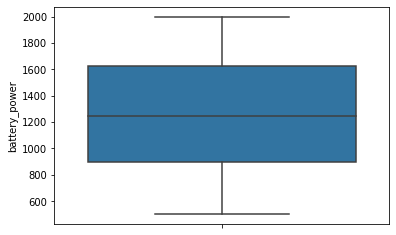

In [25]:
sns.boxplot(y='battery_power',data=data)

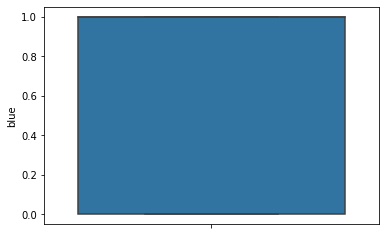

In [26]:
sns.boxplot(y='blue',data=data)

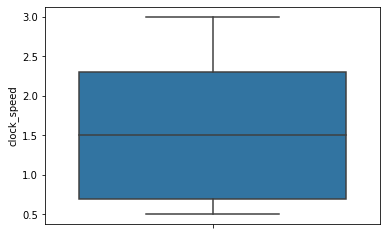

In [27]:
sns.boxplot(y='clock_speed',data=data)

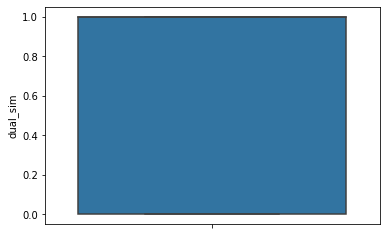

In [28]:
sns.boxplot(y='dual_sim',data=data)

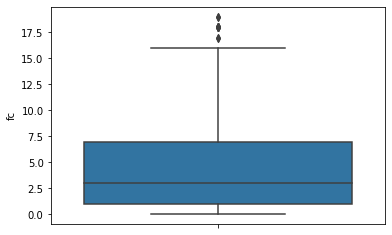

In [29]:
sns.boxplot(y='fc',data=data)

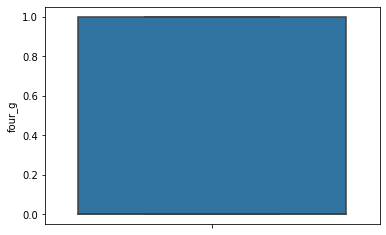

In [30]:
sns.boxplot(y='four_g',data=data)

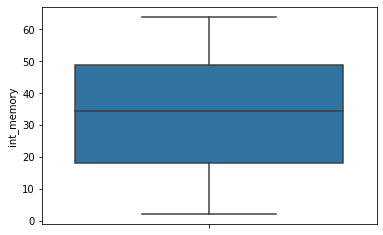

In [31]:
sns.boxplot(y='int_memory',data=data)

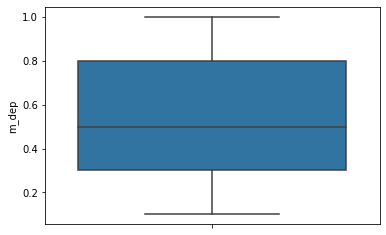

In [33]:
sns.boxplot(y='m_dep',data=data)

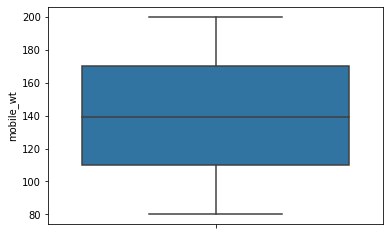

In [34]:
sns.boxplot(y='mobile_wt',data=data)

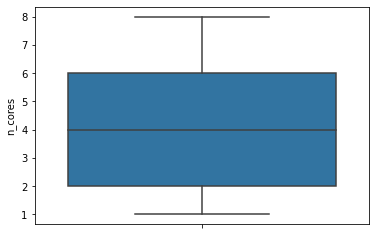

In [35]:
sns.boxplot(y='n_cores',data=data)

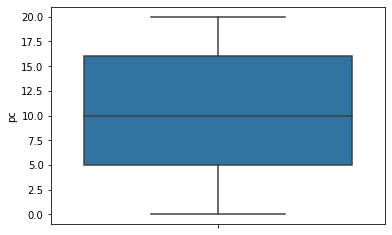

In [36]:
sns.boxplot(y='pc',data=data)

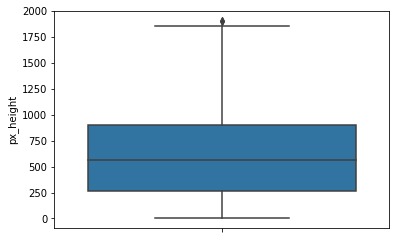

In [37]:
sns.boxplot(y='px_height',data=data)

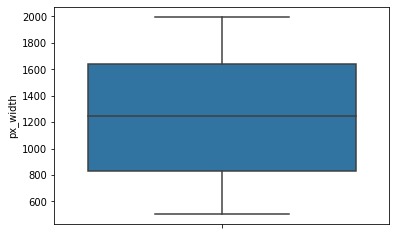

In [38]:
sns.boxplot(y='px_width',data=data)

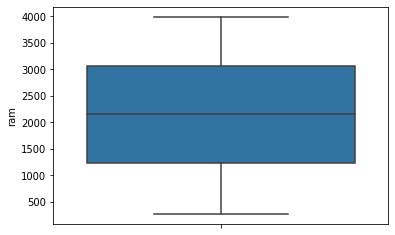

In [39]:
sns.boxplot(y='ram',data=data)

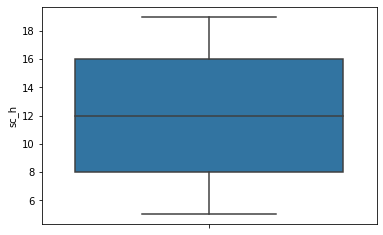

In [40]:
sns.boxplot(y='sc_h',data=data)

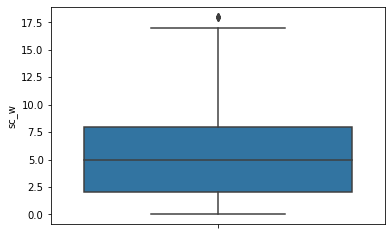

In [41]:
sns.boxplot(y='sc_w',data=data)

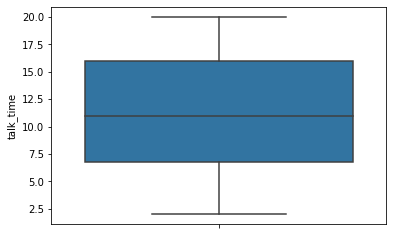

In [42]:
sns.boxplot(y='talk_time',data=data)

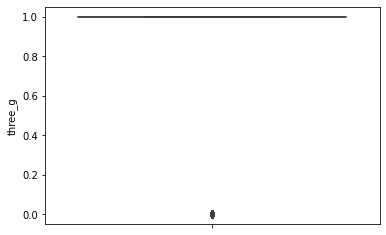

In [43]:
sns.boxplot(y='three_g',data=data)

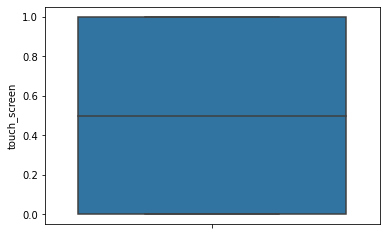

In [44]:
sns.boxplot(y='touch_screen',data=data)

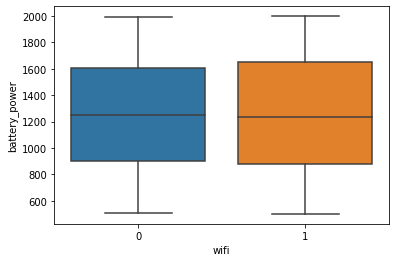

In [52]:
sns.boxplot(x='wifi', y='battery_power',data=data)

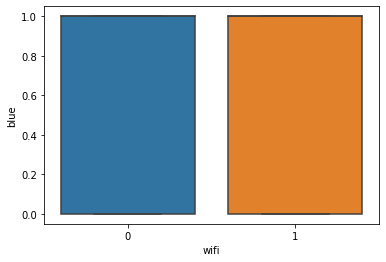

In [53]:
sns.boxplot(x='wifi', y='blue',data=data)

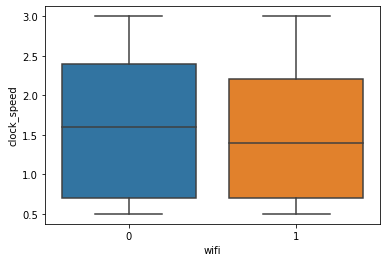

In [54]:
sns.boxplot(x='wifi', y='clock_speed',data=data)

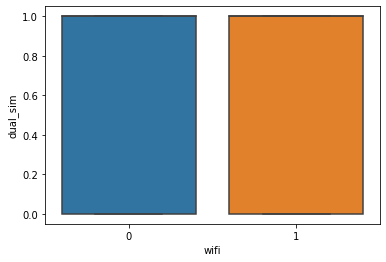

In [55]:
sns.boxplot(x='wifi', y='dual_sim',data=data)

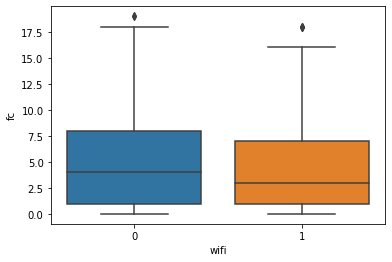

In [56]:
sns.boxplot(x='wifi', y='fc',data=data)

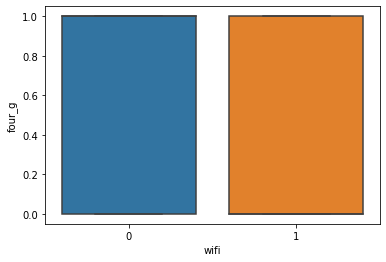

In [57]:
sns.boxplot(x='wifi', y='four_g',data=data)

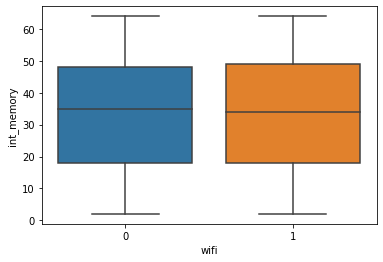

In [58]:
sns.boxplot(x='wifi', y='int_memory',data=data)

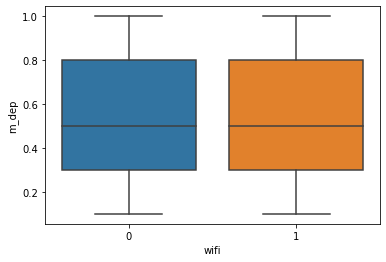

In [59]:
sns.boxplot(x='wifi', y='m_dep',data=data)

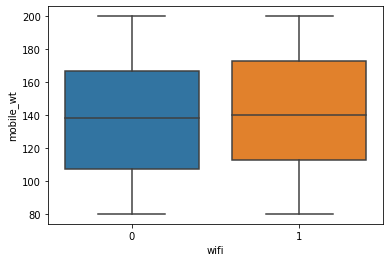

In [60]:
sns.boxplot(x='wifi', y='mobile_wt',data=data)

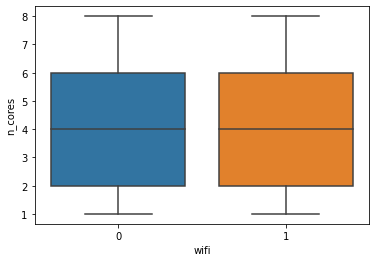

In [61]:
sns.boxplot(x='wifi', y='n_cores',data=data)

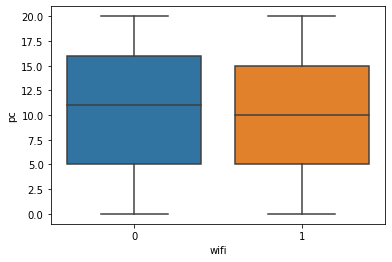

In [62]:
sns.boxplot(x='wifi', y='pc',data=data)

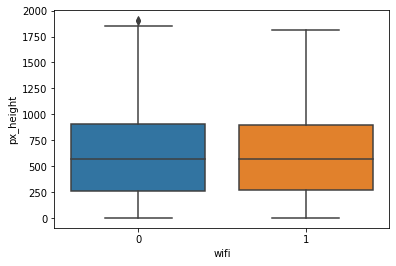

In [63]:
sns.boxplot(x='wifi', y='px_height',data=data)

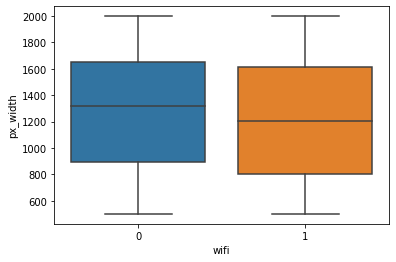

In [64]:
sns.boxplot(x='wifi', y='px_width',data=data)

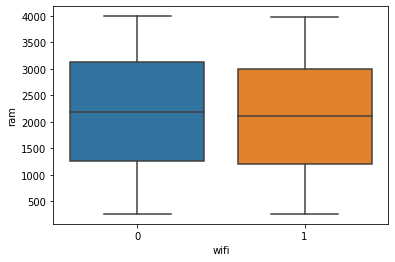

In [65]:
sns.boxplot(x='wifi', y='ram',data=data)

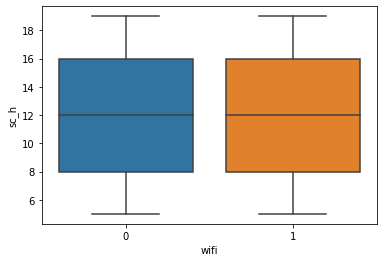

In [66]:
sns.boxplot(x='wifi', y='sc_h',data=data)

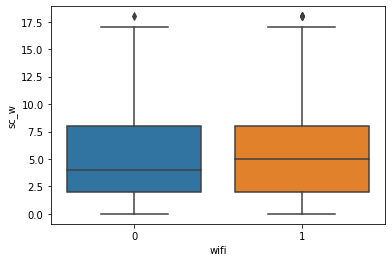

In [67]:
sns.boxplot(x='wifi', y='sc_w',data=data)

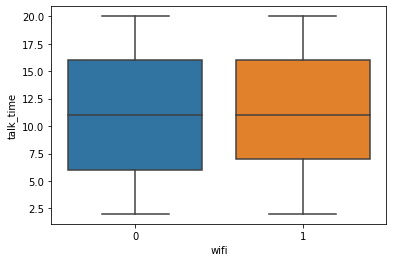

In [68]:
sns.boxplot(x='wifi', y='talk_time',data=data)

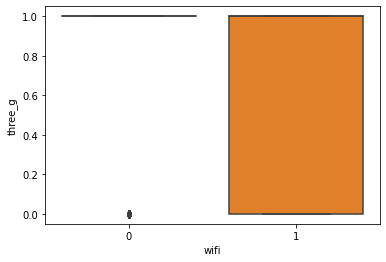

In [69]:
sns.boxplot(x='wifi', y='three_g',data=data)

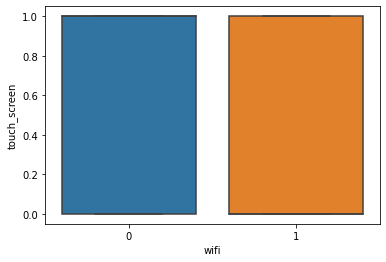

In [71]:
sns.boxplot(x='wifi', y='touch_screen',data=data)

## Data splitting

In [77]:
X = data.iloc[:,0:19]
y = data['wifi']

In [78]:
X.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1256     0          0.5         0  15       1          51    0.6   
1           1186     1          2.3         1   1       0          25    0.1   
2            880     0          0.5         1   7       1          32    0.5   
3           1605     1          1.3         0   1       1          51    0.8   
4           1383     0          1.7         0  11       1          40    0.1   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0         83        2  18        436      1308  2213    13     9         12   
1         88        4   7         85      1012  1270    18     9         17   
2        141        4  17        346       739  1141    19    17         20   
3         83        4  20        597       921  1310    11     9         10   
4        147        6  19        487       507  2510    18     9         19   

   three_g  touch_screen  
0        1             1  
1        0             1  
2        1             1  
3        1             1  
4        1             1

In [79]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: wifi, dtype: int64

## Feature importance

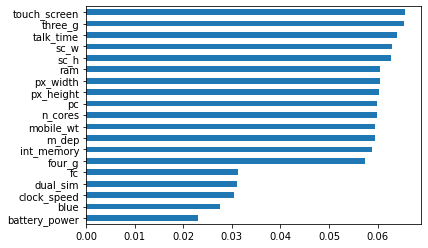

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
fmodel = ExtraTreesClassifier()
fmodel.fit(X,y)
feat_importances=pd.Series(sorted(fmodel.feature_importances_),index= X.columns)
feat_importances.plot(kind='barh')
plt.show()

### Label encoder

In [81]:
le = LabelEncoder()
y = le.fit_transform(y)

## Training model

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=1)

In [83]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Performance Evaluation

In [86]:
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test, pred),5)*100,"%")

Accuracy: 51.0 %


### Confusion matrix

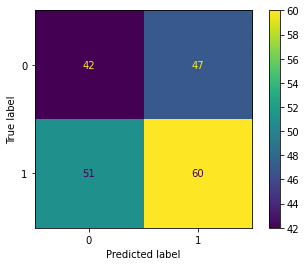

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()